In [1]:
from src.models.patch_mlp import PatchMLPModel, Game
from src.player import *
from src.utils import pyplot_game
import numpy as np
import matplotlib.pyplot as plt
import torch

In [24]:

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)
model = PatchMLPModel.load('weights/patch_mlp_7x7_512_halving_mr_l.pth', device)
player = ThresholdPlayer(model, 0.01, 0.95)

In [2]:
# 9 = closed cledd, 10 = flag
g = np.array([[
    [9,9,9,9,9,9,9,9,9],
    [9,10,4,2,2,9,9,1,9],
    [10,10,2,1,10,2,1,2,9],
    [2,2,1,2,2,2,0,2,9],
    [0,1,1,2,10,1,1,3,9],
    [0,1,10,2,1,2,3,10,9],
    [0,1,1,1,0,1,10,10,9],
]])

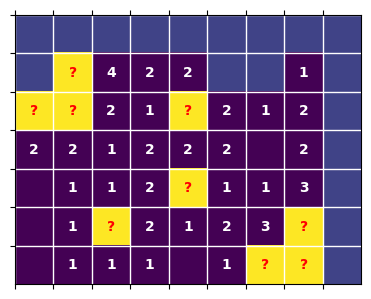

In [3]:
ax, s, h = pyplot_game(g[0], print_zeros=False)

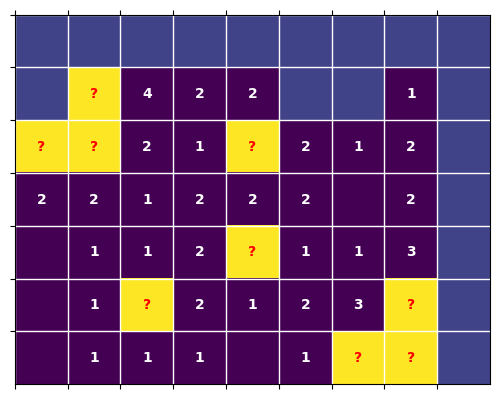

In [4]:
fig, ax = plt.subplots()
pyplot_game(g[0], print_zeros=False, ax=ax)
plt.show()

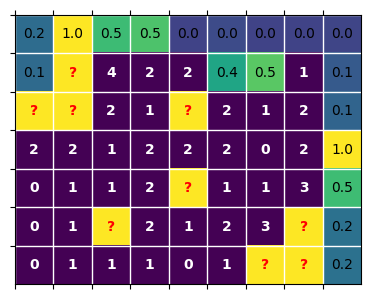

<Axes: >

In [5]:
p = model(g, np.array([12]))
pyplot_game(g[0], mine_probs=p[0])

In [6]:
g = Game(16, 30, 99, n=1)
g.random_open(0.3)
g.random_flags(0.3)

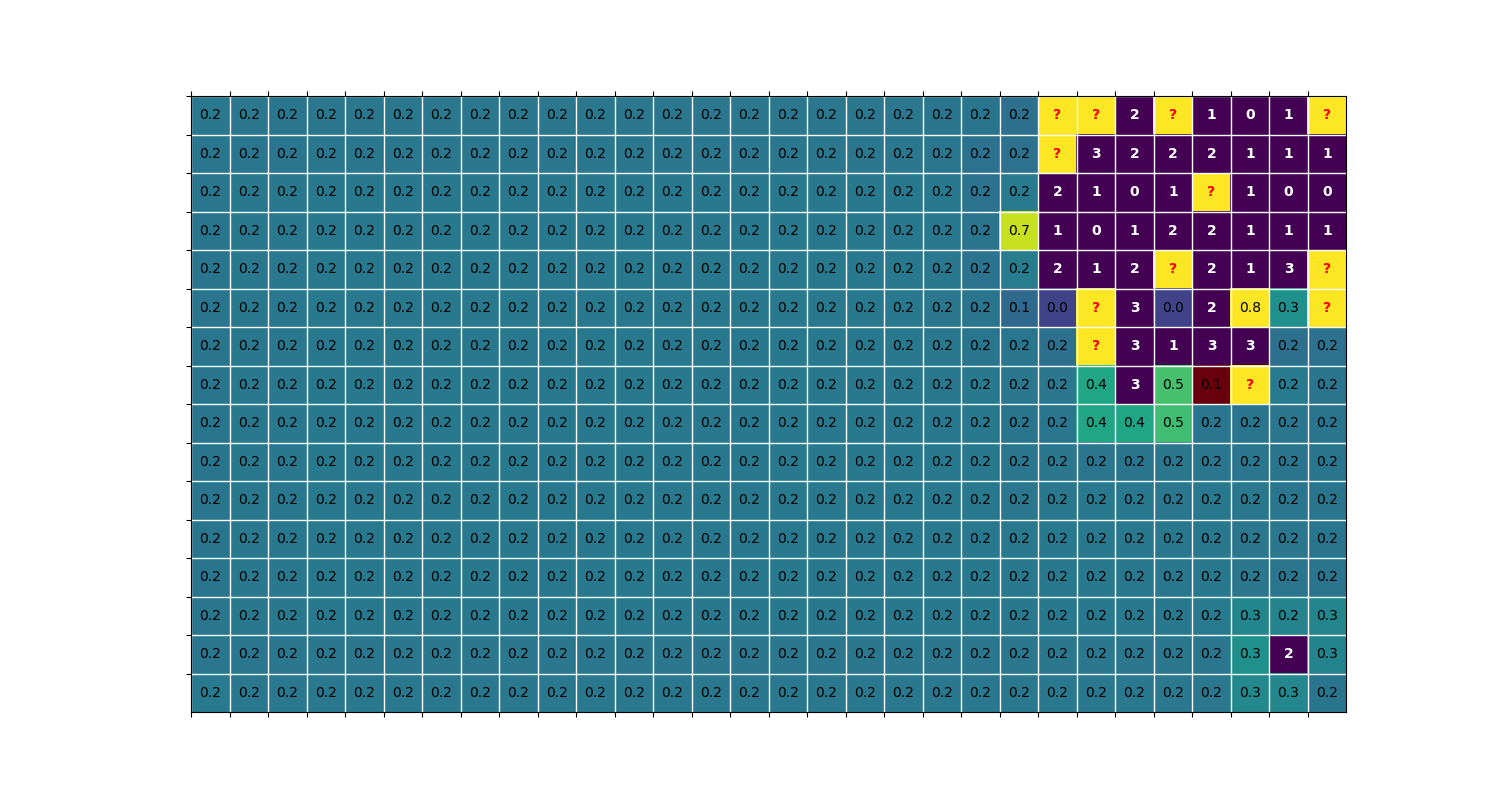

(<Axes: >,
 <matplotlib.image.AxesImage at 0x1960ad1e060>)

In [21]:
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0])

[ True]
[False]


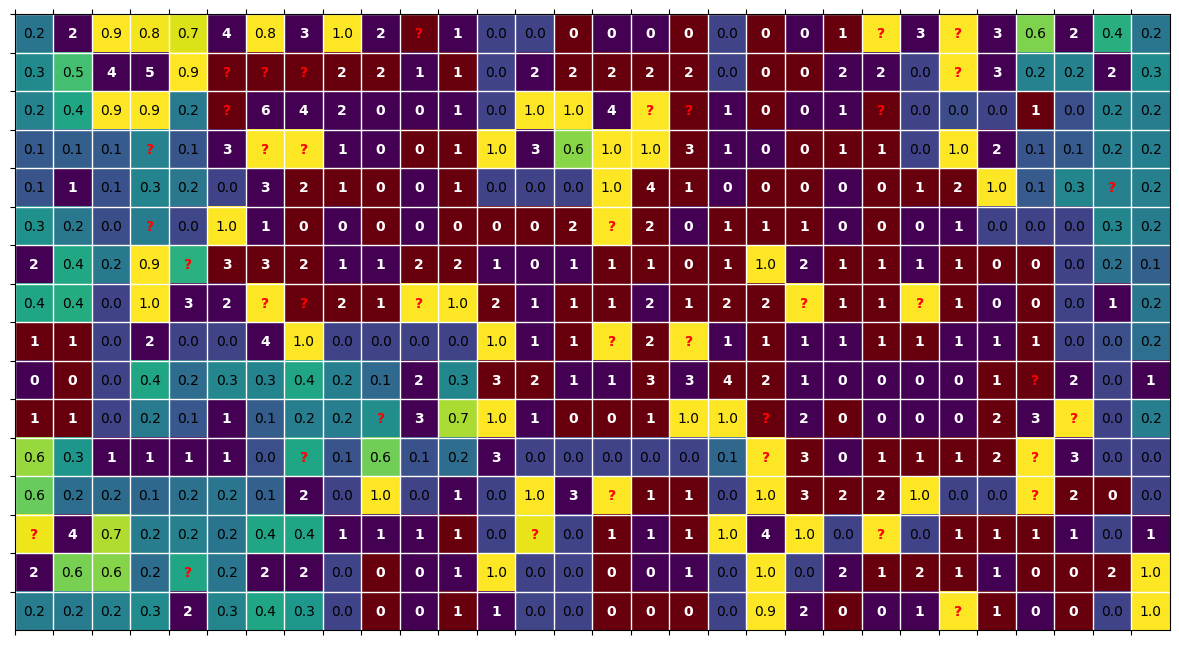

<Axes: >

In [8]:
p, o, f = player.step(g)
print(g.active_games)
print(g.won)
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], highlight_losing_only=False, print_zeros= True) # highlight newly opened in red

[False]
[ True]
[1.]


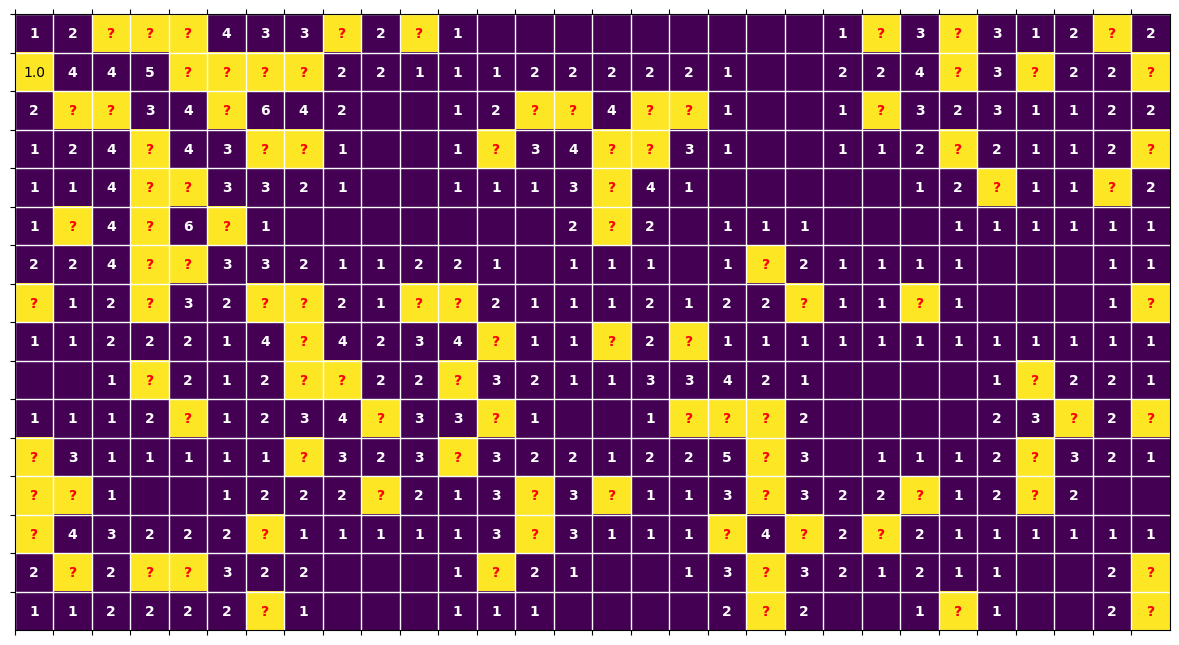

<Axes: >

In [9]:
player.play(g) # play untill the end
print(g.active_games)
print(g.won)
print(g.scores())
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], print_zeros=False)

In [16]:
games = Game(16, 30, 99, 500)
player.play(games)
print(f'average score: {np.average(games.scores(final_only=True))}')
print(f'win rate: {games.win_rate()}')

average score: 0.3775590551181102
win rate: 0.136


In [22]:
g = Game(16, 30, 99, n=1)

MovieWriter ffmpeg unavailable; using Pillow instead.


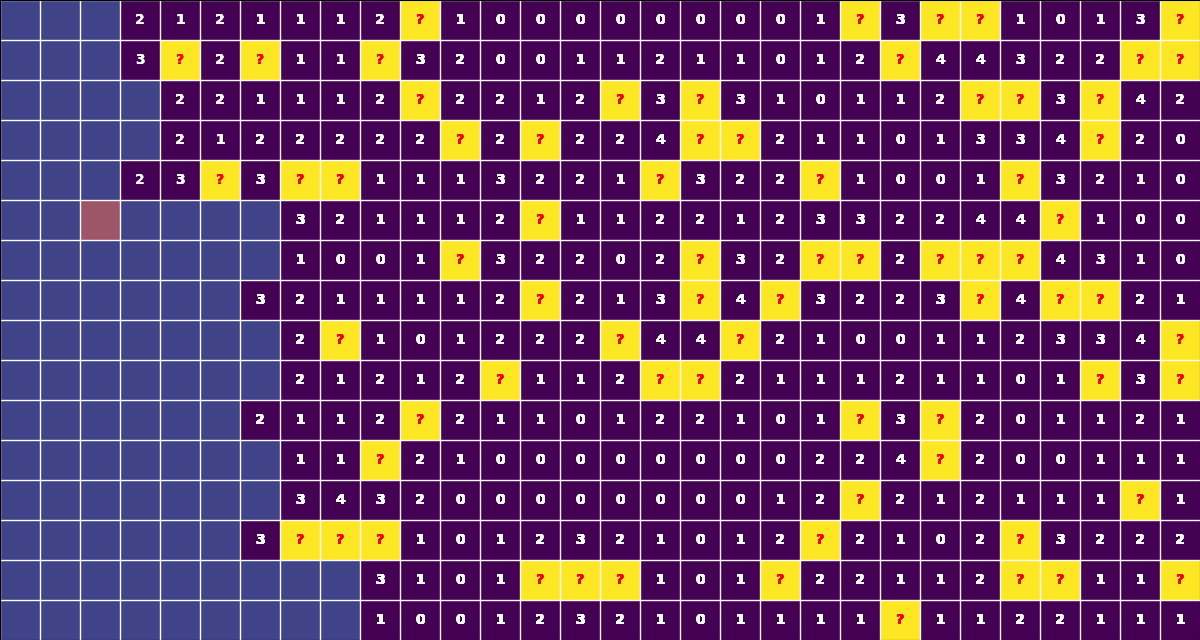

In [23]:
%matplotlib widget
animation = GameAnimation(g, player)
animation.animation.save('animation.gif')